In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# <font face="gotham" color="purple"> Linear VS Nonlinear Model </font>

Take a look at these models
$$
\begin{aligned}
&Y_{i}=\beta_{1}+\beta_{2}\left(\frac{1}{X_{i}}\right)+u_{i}\\
&Y_{i}=\beta_{1}+\beta_{2} \ln X_{i}+u_{i}\\
&\text { In } Y_{i}=\beta_{1}+\beta_{2} X_{i}+u_{i}\\
&\ln Y_{i}=\ln \beta_{1}+\beta_{2} \ln X_{i}+u_{i}\\
&\ln Y_{i}=\beta_{1}-\beta_{2}\left(\frac{1}{X_{i}}\right)+u_{i}
\end{aligned}
$$
The variables might have some nonlinear form, but parameters are all linear (the $4$th model can denote $\alpha_1=\ln{\beta_1}$), as long as we can convert them into linear form with some mathematical manipulation, we call them **intrinsically linear models**. 


How about these two models?
\begin{aligned}
&Y_{i}=e^{\beta_{1}+\beta_{2} X_{i}+u_{i}} \\
&Y_{i}=\frac{1}{1+e^{\beta_{1}+\beta_{2} X_{i}+u_{i}}} \\
\end{aligned}
The first one can be easily converted into linear one by taking natural log
$$
\ln{Y_i}=\beta_{1}+\beta_{2} X_{i}+u_{i}
$$
The second one is bit tricky, we will deal with it in more details in chapter of binary choice model. But you can be assured that with a little manipulation the model becomes
$$
\ln \left(\frac{1-Y_{i}}{Y_{i}}\right)=\beta_{1}+\beta_{2} X_{i}+u_{i}
$$
which is also intrinsically linear.

These two models are **intrinsically nonlinear model**, there is no way to turn them into linear form.
\begin{aligned}
&Y_{i}=\beta_{1}+\left(0.75-\beta_{1}\right) e^{-\beta_{2}\left(X_{i}-2\right)}+u_{i} \\
&Y_{i}=\beta_{1}+\beta_{2}^{3} X_{i}+u_{i}\\
\end{aligned}

Can we transform Cobb-Douglas model into linear form? The first one can, by taking natural log. But the second one has an additive disturbance term, which make it intrinsically nonlinear.
\begin{aligned}
&Y_{i}=\beta_{1} X_{2 i}^{\beta_{2}} X_{3 i}^{\beta_{3}} u_{i}\\
&Y_{i}=\beta_{1} X_{2 i}^{\beta_{2}} X_{3 i}^{\beta_{3}}+ u_{i}\\
\end{aligned}

Here is another famous economic model, _constant elasticity of substitution_ (CES) production function.
$$
Y_{i}=A\left[\delta K_{i}^{-\beta}+(1-\delta) L_{i}^{-\beta}\right]^{-1 / \beta}u_i
$$
No matter what you do with it, it can't be transformed into linear form, thus it is intrinsically nonlinear

# <font face="gotham" color="purple"> OLS On A Nonlinear Model </font>

Consider an intrinsically nonlinear model
$$
Y_{i}=\beta_{1} e^{\beta_{2}X_{i}}+u_{i}
$$
Use the OLS algorithm that minimize $RSS$
$$
\begin{gathered}
\sum_{i=0}^n u_{i}^{2}=\sum_{i=0}^n\left(Y_{i}-\beta_{1} e^{\beta_{2} X_{i}}\right)^{2}
\end{gathered}
$$
Take partial derivative with respect to both $\beta_1$ and $\beta_2$, the first order conditions are
$$
\begin{gathered}
\frac{\partial \sum_{i=0}^n u_{i}^{2}}{\partial \beta_{1}}=2 \sum_{i=0}^n\left(Y_{i}-\beta_{1} e^{\beta_{2} X_{i}}\right)\left(-1 e^{\beta_{2} X_{i}}\right) =0\\
\frac{\partial \sum_{i=0}^n u_{i}^{2}}{\partial \beta_{2}}=2 \sum_{i=0}^n\left(Y_{i}-\beta_{1} e^{\beta_{2} X_{i}}\right)\left(-\beta_{1} e^{\beta_{2} X_{i}} X_{i}\right)=0
\end{gathered}
$$

Collecting terms and denote the estimated coefficients as $b_1$ and $b_2$
$$
\begin{aligned}
\sum_{i=0}^n Y_{i} e^{b_{2} X_{i}} &=b_{1} e^{2 {b}_{2} X_{i}} \\
\sum_{i=0}^n Y_{i} X_{i} e^{b_{2} X_{i}} &={b}_{1} \sum_{i=0}^n X_{i} e^{2 {b}_{2} X_{i}}
\end{aligned}
$$

These are solutions, but not **closed-form solution**, i.e. solve by plugging in data. So even if you have these formula, we can't input in Python, because unknowns are expressed in terms of unknowns.

# <font face="gotham" color="purple"> Gauss-Newton Iterative Method </font>

We will not talk about details of this algorithm, it only confuses you more than clarification. But this **Gauss-Newton Iterative Method** is kind of trial and error method that gradually approaching the optimized coefficients. It feeds the $RSS$ formula with parameters, record the result, then try another set of parameters, if $RSS$ gets smaller, the algorithm keeps feed parameters until the $RSS$ have no significant improvement.

Define the function
$$
Y_{i}=\beta_{1} e^{\beta_{2}X_{i}}
$$

In [2]:
def exp_func(x, beta1, beta2):
    return beta1 * np.exp(beta2*x)

Simulate data $Y$ then estimate the parameters with ```curve_fit``` function

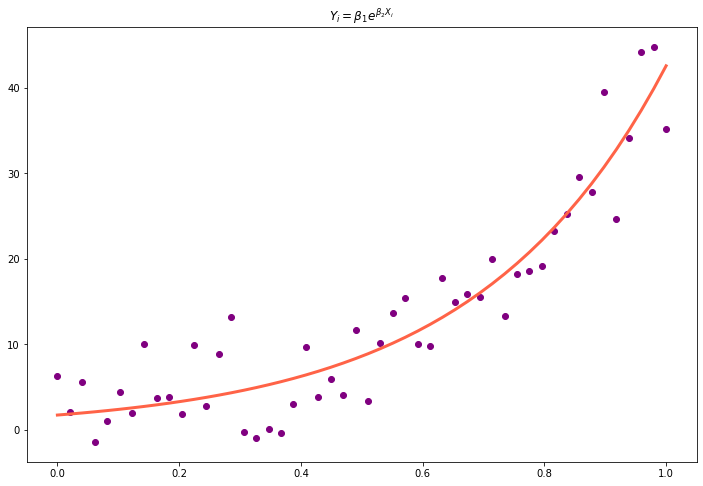

In [3]:
xdata = np.linspace(0, 1, 50)
y = exp_func(xdata, 2, 3)

y_noise =5*np.random.randn(len(y))
ydata = y + y_noise
fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(xdata, ydata, label='data', color = 'purple')
popt, pcov = curve_fit(exp_func, xdata, ydata)
ax.plot(xdata, exp_func(xdata, popt[0], popt[1]), lw = 3, color = 'tomato')
ax.set_title(r'$Y_{i}=\beta_{1} e^{\beta_{2}X_{i}}$')
plt.show()

Given the fact that this is elementary course on econometrics, we will not go any deeper in this topic. In Advanced Econometrics, we will have a very extensive discussion of nonlinear regression.

# <font face="gotham" color="purple"> Shanghai Covid  </font>

In [62]:
df_shcovid = pd.read_excel('Shanghai Covid.xlsx')

In [63]:
df_shcovid.columns = ['Date', 'Cases']
df_shcovid = df_shcovid.dropna()

Define the function
$$
Y_{i}= \beta_1 e^{\beta_{2}X_{i}}
$$

Take log on both sides. 
$$
\ln{Y_i}=\ln{\beta_1}+\beta_2 X_i 
$$

In [80]:
logY = np.log(df_shcovid['Cases'])
X = np.arange(len(Y))

X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Cases   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     463.3
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           2.65e-15
Time:                        15:01:54   Log-Likelihood:                -3.9519
No. Observations:                  22   AIC:                             11.90
Df Residuals:                      20   BIC:                             14.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4038      0.125     43.157      0.0

In [90]:
beta_1 = np.exp(model.params[0])
beta_2 = model.params[1]

Y = beta_1*np.exp(beta_2*X[:, 1])

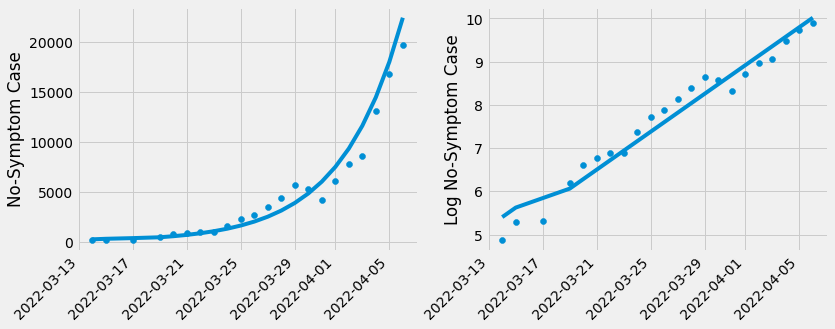

In [94]:
fig, ax = plt.subplots(figsize=(12, 5), nrows = 1, ncols = 2)
fig.autofmt_xdate(rotation=45)
ax[0].scatter(df_shcovid['Date'], df_shcovid['Cases'])
ax[0].set_ylabel('No-Symptom Case')
ax[1].plot(df_shcovid['Date'], model.fittedvalues)
ax[0].plot(df_shcovid['Date'], Y)
ax[1].set_ylabel('Log No-Symptom Case')
ax[1].scatter(df_shcovid['Date'], ln_case)

plt.show()

$$
Y_{i}= 5.4 e^{0.21X_{i}}
$$